<a href="https://colab.research.google.com/github/matthewpecsok/data_engineering/blob/main/tutorials/de_a4_example_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following shows how to hit the Smarty Streets api with the auth token, and auth id you receive in your free subscription.

We show how to extract the lat/long from the response object into a dataframe.

# the request in code blocks

Below we demonstrate each step in making the API request from smarty streets



# the API keys you need

below is a screenshot of the Smarty Streets website with the location you can grab the API token and auth id from.

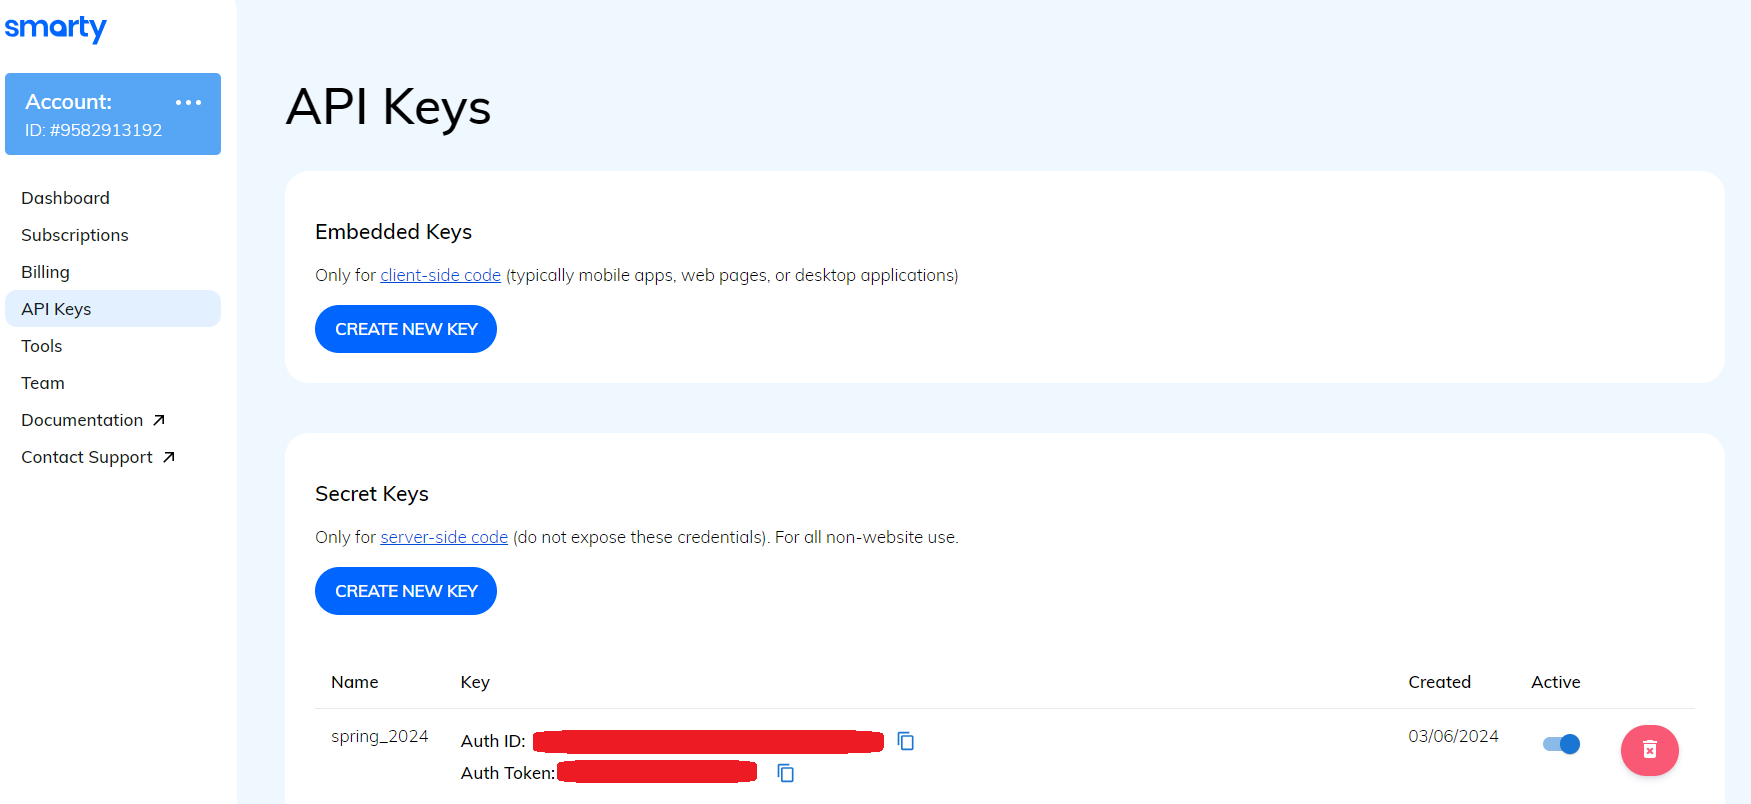

## import packages

In [1]:
import requests
import pandas as pd
import json


## get the auth id and auth token from secrets in colab

Don't store auth id or auth token as text in code, use the secrets feature.

In [2]:
from google.colab import userdata
smarty_streets_token = userdata.get('smarty_auth_token')
smarty_streets_auth_id = userdata.get('smarty_auth_id')
license = 'us-core-cloud'

## make a simple list of dictionaries of two address

create a list of 2 addresses from the dictionaries

In [3]:
address1 = {'street' : '201 Presidents Cir',
'city' : 'Salt Lake City',
'state' : 'UT',
'zip' : '84112'}

address2 = {'street' : '1655 East Campus Center Drive',
'city' : 'Salt Lake City',
'state' : 'UT',
'zip' : '84112'}


addresses_list = [address1,address2]

## create the URL with the auth id and the auth token

we embed the auth token and auth id as well as the license in a string that is the url endpoint

In [4]:
url = f"https://us-street.api.smartystreets.com/street-address?auth-id={smarty_streets_auth_id}&auth-token={smarty_streets_token}&license={license}"

## call the API with the list of addresses

In [5]:
response = requests.post(url,json=addresses_list)

## check the response (200 means we were successful)

In [6]:
response

<Response [200]>

In [7]:
if response.status_code == 200:
  print("API call was successful")
else:
  print("API call failed")
  print("Status code: ", response.status_code)
  print("Error message: ", response.text)


API call was successful


## convert the JSON response to a list of dictionaries

we have are two addresses, so the list is length = 2

In [8]:
response_list = response.json()
response_list

[{'input_index': 0,
  'candidate_index': 0,
  'delivery_line_1': '201 Presidents Cir',
  'last_line': 'Salt Lake City UT 84112-9049',
  'delivery_point_barcode': '841129049994',
  'components': {'primary_number': '201',
   'street_name': 'Presidents',
   'street_suffix': 'Cir',
   'city_name': 'Salt Lake City',
   'default_city_name': 'Salt Lake City',
   'state_abbreviation': 'UT',
   'zipcode': '84112',
   'plus4_code': '9049',
   'delivery_point': '99',
   'delivery_point_check_digit': '4'},
  'metadata': {'record_type': 'H',
   'zip_type': 'Standard',
   'county_fips': '49035',
   'county_name': 'Salt Lake',
   'carrier_route': 'C001',
   'congressional_district': '01',
   'building_default_indicator': 'Y',
   'rdi': 'Commercial',
   'elot_sequence': '0066',
   'elot_sort': 'D',
   'latitude': 40.76557,
   'longitude': -111.85043,
   'precision': 'Zip9',
   'time_zone': 'Mountain',
   'utc_offset': -7,
   'dst': True},
  'analysis': {'dpv_match_code': 'D',
   'dpv_footnotes': 'AAN1

In [13]:
from geopy.distance import geodesic

distances = []

SLC = (40.7608,-111.8910)


## compute distance and add to orig list of dictionaries.

here we compute the distance (in miles) between the 2 lat/lon we received from the API and SLC and then add them to the original dictionary

In [15]:
for address_response,address in zip(response_list,addresses_list):

  distance_in_miles = geodesic(SLC, (address_response['metadata']['latitude'],address_response['metadata']['longitude'])).miles
  address['distance'] = distance_in_miles

addresses_list

[{'street': '201 Presidents Cir',
  'city': 'Salt Lake City',
  'state': 'UT',
  'zip': '84112',
  'distance': 2.153837445760026},
 {'street': '1655 East Campus Center Drive',
  'city': 'Salt Lake City',
  'state': 'UT',
  'zip': '84112',
  'distance': 2.528211543685362}]

notice the distance is now in the dictionary for each address. sure enough presidents circle is slightly closer to downtown than SFEBB.

# summary

To summarize, we took a list of addresses, called the smarty api to geocode the addresses, took the lat/lon we received from their API and added the distance to SLC we computed to the original list.

Hopefully this is a good starting point for your assignment! Reach out with any questions.

